In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [2]:
'''!pip install vaderSentiment
!pip install transformers'''

'!pip install vaderSentiment\n!pip install transformers'

In [3]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

In [4]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

def sentiment_score(review):
    tokens = tokenizer.encode(review, return_tensors='pt')
    result = model(tokens)
    return int(torch.argmax(result.logits))+1

In [5]:
# Vader sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer # for polarity score
analyser = SentimentIntensityAnalyzer()

"""
   following functions returns positive, negative, neutral emotion score of the text respectively. 
    """;
def pos(tweet):
    SentDict = analyser.polarity_scores(tweet)
    return SentDict['pos']

def neg(tweet):
    SentDict = analyser.polarity_scores(tweet)
    return SentDict['neg']

def neu(tweet):
    SentDict = analyser.polarity_scores(tweet)
    return SentDict['neu']

In [7]:
df = pd.read_csv('IndianElection24TwitterData.csv')
df.head()

,Unnamed: 0,Date,User,Tweet
0,0,2023-05-18 23:50:47+00:00,advosushildixit,@anjanaomkashyap I am seeing you as future #bj...
1,1,2023-05-18 23:20:00+00:00,airnewsalerts,Trinamool Congress Sitting MP Abhishek Banerje...
2,2,2023-05-18 23:00:03+00:00,jiaeur,#LokSabhaElections2024\n23rd May 2024 will rev...
3,3,2023-05-18 22:53:54+00:00,PVenkatGandhi,#LokSabhaElections2024\n23rd May 2024 will rev...
4,4,2023-05-18 22:20:48+00:00,TheNirbhay1,PM Modi creates a new record of being the only...


In [9]:
modi = ["Modi","PM","modi", "#PMModi","modi ji", "narendra modi", "@narendramodi","#Vote4Modi"]
modi = [word.lower() for word in modi]  # Convert all keywords to lowercase for case-insensitive matching

modi_df = pd.DataFrame(columns=["Date", "User", "Tweet"])

def ismodi(tweet):
    tweet_lower = tweet.lower()  # Convert tweet to lowercase
    for keyword in modi:
        if keyword in tweet_lower:  # Check if keyword is in the tweet
            return True
    return False

modi_df = df[df['Tweet'].apply(lambda tweet: ismodi(tweet))]


modi_df.head()

,Unnamed: 0,Date,User,Tweet
0,0,2023-05-18 23:50:47+00:00,advosushildixit,@anjanaomkashyap I am seeing you as future #bj...
1,1,2023-05-18 23:20:00+00:00,airnewsalerts,Trinamool Congress Sitting MP Abhishek Banerje...
2,2,2023-05-18 23:00:03+00:00,jiaeur,#LokSabhaElections2024\n23rd May 2024 will rev...
3,3,2023-05-18 22:53:54+00:00,PVenkatGandhi,#LokSabhaElections2024\n23rd May 2024 will rev...
4,4,2023-05-18 22:20:48+00:00,TheNirbhay1,PM Modi creates a new record of being the only...


In [10]:
rahul = ["rahul", "Rahul", "RahulGandhi", "gandhi", "@RahulGandhi", "Gandhi",
         "#Vote4Rahul", "#Vote4Gandhi", "#Vote4RahulGandhi"]

# Convert all keywords to lowercase for case-insensitive matching
rahul = [word.lower() for word in rahul]

rahul_df = pd.DataFrame(columns=["Date", "User", "Tweet"])

def israhul(tweet):
    tweet_lower = tweet.lower()  # Convert tweet to lowercase
    for keyword in rahul:
        if keyword in tweet_lower:  # Check if keyword is in the tweet
            return True
    return False

# Filter the DataFrame directly instead of iterating over rows
rahul_df = df[df['Tweet'].apply(lambda tweet: israhul(tweet))]

rahul_df.head()

,Unnamed: 0,Date,User,Tweet
20,20,2023-05-18 19:49:52+00:00,Sunnysweet16,Wonder why no academic or journalist asks INC ...
34,34,2023-05-18 18:56:52+00:00,drnitinchaube,Congrats for the change #australiavotes2024 an...
36,36,2023-05-18 18:54:01+00:00,mrvivek07,Peopel Say “Govt Ne 70 Years Kya kiya”.\nUnse ...
39,39,2023-05-18 18:52:03+00:00,JosephPravinP,"@ajaymaken @RahulGandhi And as a final touch, ..."
40,40,2023-05-18 18:50:55+00:00,TheSaptarshiRay,I think before casting the vote for last phas...


In [10]:
from sklearn.feature_extraction import text
import string

# Assuming modi_df and rahul_df are defined as before and contain the tweets

# Define the list of stopwords
stop = text.ENGLISH_STOP_WORDS

# Function to remove stopwords
def remove_stopwords(tweet):
    return ' '.join([word for word in tweet.split() if word not in stop])

# Function to remove punctuation
def remove_punctuations(tweet):
    return tweet.translate(str.maketrans('', '', string.punctuation))

# Apply the functions to the 'Tweet' column using .loc for safe assignment
modi_df.loc[:, 'Tweet'] = modi_df['Tweet'].apply(remove_stopwords).apply(remove_punctuations)
rahul_df.loc[:, 'Tweet'] = rahul_df['Tweet'].apply(remove_stopwords).apply(remove_punctuations)

In [11]:
# Calculate the sentiment scores
modi_df['pos'] = modi_df['Tweet'].apply(pos)
modi_df['neg'] = modi_df['Tweet'].apply(neg)
modi_df['neu'] = modi_df['Tweet'].apply(neu)

# Find the column name with the highest score for each tweet
modi_df['FinalEmotion'] = modi_df[['pos', 'neg', 'neu']].idxmax(axis=1)

# Replace the column names with the corresponding string labels
emotion_labels = {'pos': 'positive', 'neg': 'negative', 'neu': 'neutral'}
modi_df['FinalEmotion'] = modi_df['FinalEmotion'].apply(lambda x: emotion_labels[x])

# Display the DataFrame
modi_df

C:\Users\HP\AppData\Local\Temp\ipykernel_13764\1681533137.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modi_df['pos'] = modi_df['Tweet'].apply(pos)
C:\Users\HP\AppData\Local\Temp\ipykernel_13764\1681533137.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modi_df['neg'] = modi_df['Tweet'].apply(neg)
C:\Users\HP\AppData\Local\Temp\ipykernel_13764\1681533137.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

,Unnamed: 0,Date,User,Tweet,pos,neg,neu,FinalEmotion
0,0,2023-05-18 23:50:47+00:00,advosushildixit,anjanaomkashyap I seeing future bjp spokespers...,0.307,0.000,0.693,neutral
1,1,2023-05-18 23:20:00+00:00,airnewsalerts,Trinamool Congress Sitting MP Abhishek Banerje...,0.000,0.000,1.000,neutral
2,2,2023-05-18 23:00:03+00:00,jiaeur,LokSabhaElections2024 23rd May 2024 reveal Ev...,0.228,0.000,0.772,neutral
3,3,2023-05-18 22:53:54+00:00,PVenkatGandhi,LokSabhaElections2024 23rd May 2024 reveal Ev...,0.228,0.000,0.772,neutral
4,4,2023-05-18 22:20:48+00:00,TheNirbhay1,PM Modi creates new record PM democratic count...,0.313,0.000,0.687,neutral
...,...,...,...,...,...,...,...,...
142550,142550,2023-03-25 16:05:20+00:00,SONUPINKOO,BanChineseCompaniesin5Gtrials India Ban Chines...,0.000,0.272,0.728,neutral
142551,142551,2023-03-25 10:50:35+00:00,SunjayJK,kanhaiyakumar narendramodi girirajsinghbjp Alm...,0.000,0.122,0.878,neutral
142552,142552,2023-03-23 05:06:36+00:00,SONUPINKOO,On 23rd March Pakistan Day I Urge Indians Dere...,0.000,0.000,1.000,neutral
142555,142555,2023-03-19 15:37:34+00:00,parthajit0101,timesofindia ArvindKejriwal AAP sirji pls deci...,0.191,0.172,0.637,neutral


In [12]:
modi_df['FinalEmotion'].value_counts()

FinalEmotion
neutral     57592
positive     1486
negative      562
Name: count, dtype: int64

C:\Users\HP\AppData\Local\Temp\ipykernel_13764\68359938.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='FinalEmotion', data=modi_df, palette=palette_colors, legend=False)


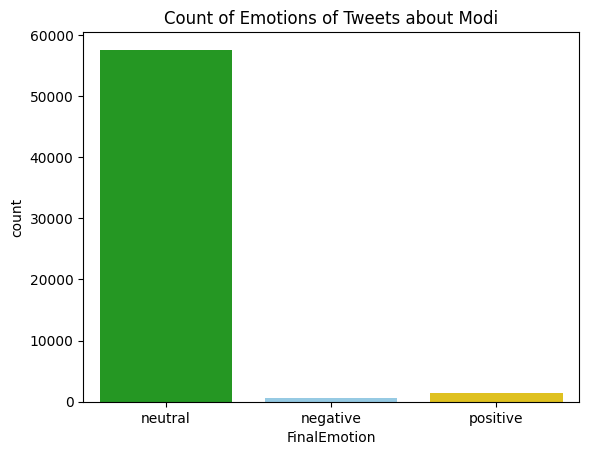

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

palette_colors = ['#12ab0f', '#89CFF0', '#FFD700'] 
ax = sns.countplot(x='FinalEmotion', data=modi_df, palette=palette_colors, legend=False)
ax.set_title('Count of Emotions of Tweets about Modi')
plt.show()

In [41]:
# Calculate the sentiment scores
rahul_df['pos'] = rahul_df['Tweet'].apply(pos)
rahul_df['neg'] = rahul_df['Tweet'].apply(neg)
rahul_df['neu'] = rahul_df['Tweet'].apply(neu)

# Find the column name with the highest score for each tweet
rahul_df['FinalEmotion'] = rahul_df[['pos', 'neg', 'neu']].idxmax(axis=1)

# Replace the column names with the corresponding string labels
emotion_labels = {'pos': 'positive', 'neg': 'negative', 'neu': 'neutral'}
rahul_df['FinalEmotion'] = rahul_df['FinalEmotion'].apply(lambda x: emotion_labels[x])

# Display the DataFrame
rahul_df

C:\Users\HP\AppData\Local\Temp\ipykernel_13764\769797800.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rahul_df['pos'] = rahul_df['Tweet'].apply(pos)
C:\Users\HP\AppData\Local\Temp\ipykernel_13764\769797800.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rahul_df['neg'] = rahul_df['Tweet'].apply(neg)
C:\Users\HP\AppData\Local\Temp\ipykernel_13764\769797800.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

,Unnamed: 0,Date,User,Tweet,pos,neg,neu,FinalEmotion
20,20,2023-05-18 19:49:52+00:00,Sunnysweet16,Wonder academic journalist asks INC India Rahu...,0.093,0.138,0.769,neutral
34,34,2023-05-18 18:56:52+00:00,drnitinchaube,Congrats change australiavotes2024 ScottMorris...,0.152,0.000,0.848,neutral
36,36,2023-05-18 18:54:01+00:00,mrvivek07,Peopel Say “Govt Ne 70 Years Kya kiya” Unse pu...,0.000,0.000,1.000,neutral
39,39,2023-05-18 18:52:03+00:00,JosephPravinP,ajaymaken RahulGandhi And final touch Modi ji ...,0.318,0.000,0.682,neutral
40,40,2023-05-18 18:50:55+00:00,TheSaptarshiRay,I think casting vote phase today People finali...,0.240,0.000,0.760,neutral
...,...,...,...,...,...,...,...,...
142556,142556,2023-03-17 08:53:28+00:00,SunjayJK,AnumaVidisha RahulGandhi ArvindKejriwal Spokes...,0.196,0.068,0.737,neutral
142557,142557,2023-03-16 08:31:31+00:00,SunjayJK,ajaishukla Arre skepticism Studio wale Maj Gnr...,0.000,0.219,0.781,neutral
142560,142560,2023-03-06 10:20:09+00:00,RAMANKAIRA,sherryontopp Early morning political detailed ...,0.101,0.000,0.899,neutral
142561,142561,2023-03-06 10:18:02+00:00,RAMANKAIRA,mayankgandhi04 mallesh2004 Early morning polit...,0.097,0.000,0.903,neutral


In [42]:
rahul_df['FinalEmotion'].value_counts()

FinalEmotion
neutral     33278
positive      684
negative      386
Name: count, dtype: int64

C:\Users\HP\AppData\Local\Temp\ipykernel_13764\857517403.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='FinalEmotion', data=rahul_df, palette=palette_colors, legend=False)


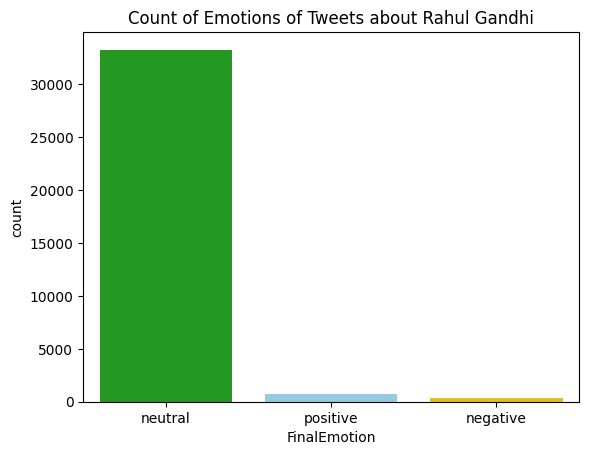

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

palette_colors = ['#12ab0f', '#89CFF0', '#FFD700'] 
ax = sns.countplot(x='FinalEmotion', data=rahul_df, palette=palette_colors, legend=False)
ax.set_title('Count of Emotions of Tweets about Rahul Gandhi')
plt.show()

In [20]:
from flair.models import TextClassifier
from flair.data import Sentence
sia = TextClassifier.load('en-sentiment')

2024-03-26 23:19:28,738 https://nlp.informatik.hu-berlin.de/resources/models/sentiment-curated-distilbert/sentiment-en-mix-distillbert_4.pt not found in cache, downloading to C:\Users\HP\AppData\Local\Temp\tmp_xd6cnkx


100%|██████████| 253M/253M [05:46<00:00, 767kB/s]    

2024-03-26 23:25:16,041 copying C:\Users\HP\AppData\Local\Temp\tmp_xd6cnkx to cache at C:\Users\HP\.flair\models\sentiment-en-mix-distillbert_4.pt


2024-03-26 23:25:16,333 removing temp file C:\Users\HP\AppData\Local\Temp\tmp_xd6cnkx


In [44]:
def flair_prediction(x):
    sentence = Sentence(x)
    sia.predict(sentence)
    score = sentence.labels[0]
    if "POSITIVE" in str(score):
        return "pos"
    elif "NEGATIVE" in str(score):
        return "neg"
    else:
        return "neu"

In [46]:
# Define the columns to drop
columns_to_drop = ['pos', 'neg', 'neu', 'FinalEmotion']

# Drop the columns from rahul_df if they exist
for column in columns_to_drop:
    if column in rahul_df.columns:
        rahul_df.drop(column, axis=1, inplace=True)

# Drop the columns from modi_df if they exist
for column in columns_to_drop:
    if column in modi_df.columns:
        modi_df.drop(column, axis=1, inplace=True)

In [59]:
rahul_df.drop(columns_to_drop, axis=1, inplace=True, errors='ignore')


C:\Users\HP\AppData\Local\Temp\ipykernel_13764\1927329554.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rahul_df.drop(columns_to_drop, axis=1, inplace=True, errors='ignore')


In [60]:
modi_df.drop(columns_to_drop, axis=1, inplace=True, errors='ignore')

C:\Users\HP\AppData\Local\Temp\ipykernel_13764\606774815.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modi_df.drop(columns_to_drop, axis=1, inplace=True, errors='ignore')


In [61]:
rahul_df

,Unnamed: 0,Date,User,Tweet
20,20,2023-05-18 19:49:52+00:00,Sunnysweet16,Wonder academic journalist asks INC India Rahu...
34,34,2023-05-18 18:56:52+00:00,drnitinchaube,Congrats change australiavotes2024 ScottMorris...
36,36,2023-05-18 18:54:01+00:00,mrvivek07,Peopel Say “Govt Ne 70 Years Kya kiya” Unse pu...
39,39,2023-05-18 18:52:03+00:00,JosephPravinP,ajaymaken RahulGandhi And final touch Modi ji ...
40,40,2023-05-18 18:50:55+00:00,TheSaptarshiRay,I think casting vote phase today People finali...
...,...,...,...,...
142556,142556,2023-03-17 08:53:28+00:00,SunjayJK,AnumaVidisha RahulGandhi ArvindKejriwal Spokes...
142557,142557,2023-03-16 08:31:31+00:00,SunjayJK,ajaishukla Arre skepticism Studio wale Maj Gnr...
142560,142560,2023-03-06 10:20:09+00:00,RAMANKAIRA,sherryontopp Early morning political detailed ...
142561,142561,2023-03-06 10:18:02+00:00,RAMANKAIRA,mayankgandhi04 mallesh2004 Early morning polit...


In [64]:
# Applying flair on both the dataframes
rahul_df['Emotion']=rahul_df['Tweet'].apply(flair_prediction)


C:\Users\HP\AppData\Local\Temp\ipykernel_13764\2020622613.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rahul_df['Emotion']=rahul_df['Tweet'].apply(flair_prediction)


In [65]:
modi_df['Emotion']=modi_df['Tweet'].apply(flair_prediction)

C:\Users\HP\AppData\Local\Temp\ipykernel_13764\592267515.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modi_df['Emotion']=modi_df['Tweet'].apply(flair_prediction)


C:\Users\HP\AppData\Local\Temp\ipykernel_13764\575044341.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=modi_df['Emotion'],palette=['#36454F','#89CFF0'])


Text(0.5, 1.0, 'Sentiments scores of Tweets about Modi')

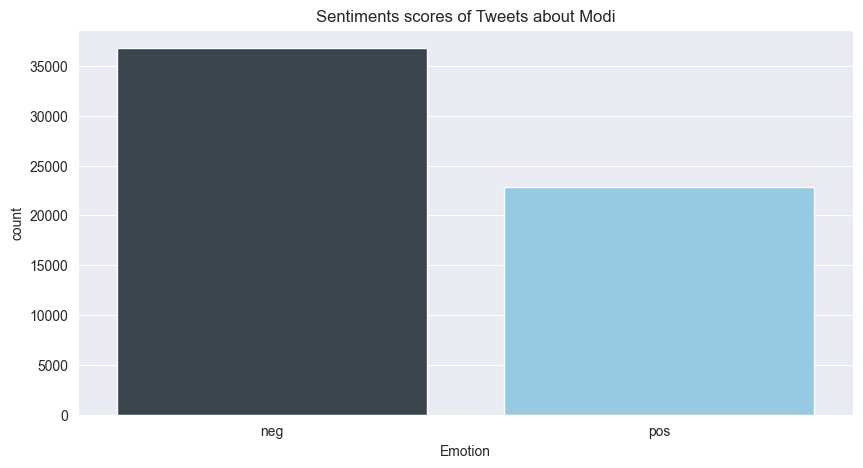

In [82]:
# Sentiments for Narendra Modi
plt.figure(figsize=(10,5))
sns.set_style("darkgrid")
ax = sns.countplot(x=modi_df['Emotion'],palette=['#36454F','#89CFF0'])
ax.set_title('Sentiments scores of Tweets about Modi')

C:\Users\HP\AppData\Local\Temp\ipykernel_13764\2565567294.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=rahul_df['Emotion'],palette=['#89CFF0','#36454F'])


Text(0.5, 1.0, 'Sentiments scores of Tweets about Rahul Gandhi')

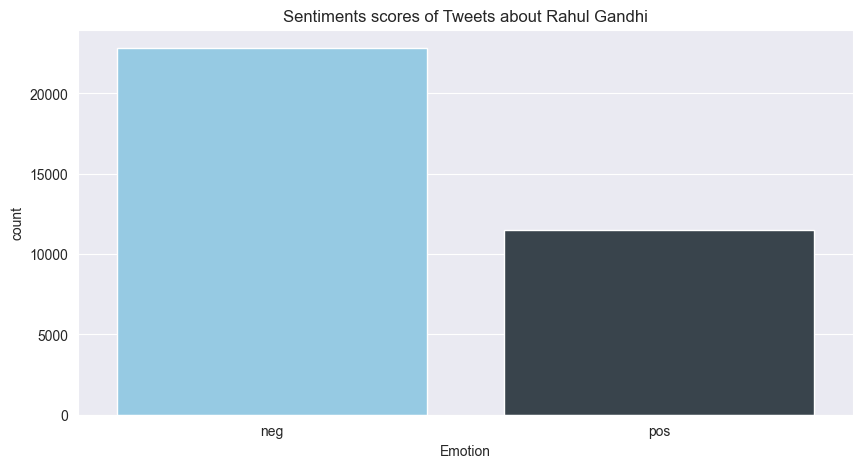

In [83]:
# Sentiments for Rahul Gandhi
plt.figure(figsize=(10,5))
sns.set_style("darkgrid")
ax = sns.countplot(x=rahul_df['Emotion'],palette=['#89CFF0','#36454F'])
ax.set_title('Sentiments scores of Tweets about Rahul Gandhi')

#Tweets Polarity visualization as timeseries

Lets do the timeseries analysis
As we are given a timestamp of the tweets, lets see the polarity change of tweets with time

In [68]:
df

,Unnamed: 0,Date,User,Tweet,NaModi,RaGandhi
0,0,2023-05-18 23:50:47+00:00,advosushildixit,@anjanaomkashyap I am seeing you as future #bj...,1,0
1,1,2023-05-18 23:20:00+00:00,airnewsalerts,Trinamool Congress Sitting MP Abhishek Banerje...,1,0
2,2,2023-05-18 23:00:03+00:00,jiaeur,#LokSabhaElections2024\n23rd May 2024 will rev...,1,0
3,3,2023-05-18 22:53:54+00:00,PVenkatGandhi,#LokSabhaElections2024\n23rd May 2024 will rev...,1,0
4,4,2023-05-18 22:20:48+00:00,TheNirbhay1,PM Modi creates a new record of being the only...,1,0
...,...,...,...,...,...,...
78054,142555,2023-03-19 15:37:34+00:00,parthajit0101,"@timesofindia #ArvindKejriwal, #AAP sirji pls ...",1,0
78055,142556,2023-03-17 08:53:28+00:00,SunjayJK,@AnumaVidisha @RahulGandhi @ArvindKejriwal whe...,1,1
78056,142560,2023-03-06 10:20:09+00:00,RAMANKAIRA,@sherryontopp Early morning #political move af...,0,1
78057,142561,2023-03-06 10:18:02+00:00,RAMANKAIRA,@mayankgandhi04 @mallesh_2004 Early morning #p...,0,1


In [69]:
# Keywords mentioning Modi and Rahul respectively
NaMo_ref = ["Modi","PM","modi", "#PMModi","modi ji", "narendra modi", "@narendramodi","#Vote4Modi"]
RaGa_ref = ["rahul", "Rahul","RahulGandhi", "gandhi","@RahulGandhi","Gandhi","#Vote4Rahul","#Vote4Gandhi","#Vote4RahulGandhi"]

In [70]:
# method to refer whether contains perticular words in tweets 
def identify_subject(tweet, refs):
    flag = 0 
    for ref in refs:
        if tweet.find(ref) != -1:
            flag = 1
    return flag

"""
 finding whether the tweet referred about Modi or Rahul
    """;
df['NaModi'] = df['Tweet'].apply(lambda x: identify_subject(x, NaMo_ref))
df['RaGandhi'] = df['Tweet'].apply(lambda x: identify_subject(x, RaGa_ref))
df.head(10)

,Unnamed: 0,Date,User,Tweet,NaModi,RaGandhi
0,0,2023-05-18 23:50:47+00:00,advosushildixit,@anjanaomkashyap I am seeing you as future #bj...,1,0
1,1,2023-05-18 23:20:00+00:00,airnewsalerts,Trinamool Congress Sitting MP Abhishek Banerje...,1,0
2,2,2023-05-18 23:00:03+00:00,jiaeur,#LokSabhaElections2024\n23rd May 2024 will rev...,1,0
3,3,2023-05-18 22:53:54+00:00,PVenkatGandhi,#LokSabhaElections2024\n23rd May 2024 will rev...,1,0
4,4,2023-05-18 22:20:48+00:00,TheNirbhay1,PM Modi creates a new record of being the only...,1,0
5,5,2023-05-18 22:16:26+00:00,ankitgarg20,My somewhat biased exit poll for India electio...,1,0
6,7,2023-05-18 21:43:15+00:00,rohanmodi,@abhijitmajumder Small correction. Nobody gets...,1,0
7,9,2023-05-18 21:22:29+00:00,ShakeChilli,@abhijitmajumder Appointment of Successor! \n\...,1,0
8,11,2023-05-18 21:19:44+00:00,UttarrPradesh,Which of the following should be top priority ...,1,0
9,13,2023-05-18 21:00:52+00:00,Mdsr20351488,After 5yrs of Modi 🙁\n\n-SC vs SC\n-EC vs EC\n...,1,0


In [71]:
"""
 Filtering tweets mentioning either one of the pm candidate or both
 assigning 1 for NaModi and RaGandhi variables where there is a mention of them in the tweets 
 which was already decide by looking the keywords in tweets
    """;
df=df[(df['NaModi']==1) | (df['RaGandhi']==1)]

In [72]:
df

,Unnamed: 0,Date,User,Tweet,NaModi,RaGandhi
0,0,2023-05-18 23:50:47+00:00,advosushildixit,@anjanaomkashyap I am seeing you as future #bj...,1,0
1,1,2023-05-18 23:20:00+00:00,airnewsalerts,Trinamool Congress Sitting MP Abhishek Banerje...,1,0
2,2,2023-05-18 23:00:03+00:00,jiaeur,#LokSabhaElections2024\n23rd May 2024 will rev...,1,0
3,3,2023-05-18 22:53:54+00:00,PVenkatGandhi,#LokSabhaElections2024\n23rd May 2024 will rev...,1,0
4,4,2023-05-18 22:20:48+00:00,TheNirbhay1,PM Modi creates a new record of being the only...,1,0
...,...,...,...,...,...,...
78054,142555,2023-03-19 15:37:34+00:00,parthajit0101,"@timesofindia #ArvindKejriwal, #AAP sirji pls ...",1,0
78055,142556,2023-03-17 08:53:28+00:00,SunjayJK,@AnumaVidisha @RahulGandhi @ArvindKejriwal whe...,1,1
78056,142560,2023-03-06 10:20:09+00:00,RAMANKAIRA,@sherryontopp Early morning #political move af...,0,1
78057,142561,2023-03-06 10:18:02+00:00,RAMANKAIRA,@mayankgandhi04 @mallesh_2004 Early morning #p...,0,1


In [73]:
df=df.reset_index()
df.drop('index',axis=1,inplace=True)
df


,Unnamed: 0,Date,User,Tweet,NaModi,RaGandhi
0,0,2023-05-18 23:50:47+00:00,advosushildixit,@anjanaomkashyap I am seeing you as future #bj...,1,0
1,1,2023-05-18 23:20:00+00:00,airnewsalerts,Trinamool Congress Sitting MP Abhishek Banerje...,1,0
2,2,2023-05-18 23:00:03+00:00,jiaeur,#LokSabhaElections2024\n23rd May 2024 will rev...,1,0
3,3,2023-05-18 22:53:54+00:00,PVenkatGandhi,#LokSabhaElections2024\n23rd May 2024 will rev...,1,0
4,4,2023-05-18 22:20:48+00:00,TheNirbhay1,PM Modi creates a new record of being the only...,1,0
...,...,...,...,...,...,...
78054,142555,2023-03-19 15:37:34+00:00,parthajit0101,"@timesofindia #ArvindKejriwal, #AAP sirji pls ...",1,0
78055,142556,2023-03-17 08:53:28+00:00,SunjayJK,@AnumaVidisha @RahulGandhi @ArvindKejriwal whe...,1,1
78056,142560,2023-03-06 10:20:09+00:00,RAMANKAIRA,@sherryontopp Early morning #political move af...,0,1
78057,142561,2023-03-06 10:18:02+00:00,RAMANKAIRA,@mayankgandhi04 @mallesh_2004 Early morning #p...,0,1


In [74]:
# Import stopwords
import nltk
from nltk.corpus import stopwords

# Import textblob
from textblob import Word, TextBlob
import nltk

# Downloading imp libraries and packages
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = stopwords.words('english')
!python -m textblob.download_corpora

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


In [75]:
"""
 Processing tweets by removing stopwords from nltk library
    """;
def preprocess_tweets(tweet):
    processed_tweet = tweet
    processed_tweet.replace('[^\w\s]', '')
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in stop_words)
    processed_tweet = " ".join(Word(word).lemmatize() for word in processed_tweet.split())
    return(processed_tweet)

df['Processed Tweet'] = df['Tweet'].apply(lambda x: preprocess_tweets(x))
df.head()

,Unnamed: 0,Date,User,Tweet,NaModi,RaGandhi,Processed Tweet
0,0,2023-05-18 23:50:47+00:00,advosushildixit,@anjanaomkashyap I am seeing you as future #bj...,1,0,@anjanaomkashyap I seeing future #bjp spokespe...
1,1,2023-05-18 23:20:00+00:00,airnewsalerts,Trinamool Congress Sitting MP Abhishek Banerje...,1,0,Trinamool Congress Sitting MP Abhishek Banerje...
2,2,2023-05-18 23:00:03+00:00,jiaeur,#LokSabhaElections2024\n23rd May 2024 will rev...,1,0,#LokSabhaElections2024 23rd May 2024 reveal .....
3,3,2023-05-18 22:53:54+00:00,PVenkatGandhi,#LokSabhaElections2024\n23rd May 2024 will rev...,1,0,#LokSabhaElections2024 23rd May 2024 reveal .....
4,4,2023-05-18 22:20:48+00:00,TheNirbhay1,PM Modi creates a new record of being the only...,1,0,PM Modi creates new record PM democratic count...


In [76]:
print('Base Tweet\n', df['Tweet'][0])
print('\n------------------------------------\n')
print('Cleaned Tweet\n', df['Processed Tweet'][0])

Base Tweet
 @anjanaomkashyap I am seeing you as future #bjp spokesperson..
Good luck. Anjana Om Modi oops Kashyap.
Journalists like you changed the meaning of journalism. Janta maaf nai karege

------------------------------------

Cleaned Tweet
 @anjanaomkashyap I seeing future #bjp spokesperson.. Good luck. Anjana Om Modi oops Kashyap. Journalists like changed meaning journalism. Janta maaf nai karege


In [77]:
# Calculate polarity and subjectivity of the tweet
df['polarity'] = df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[0])
df['subjectivity'] = df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[1])
df[['Processed Tweet', 'NaModi', 'RaGandhi', 'polarity', 'subjectivity']].head()

,Processed Tweet,NaModi,RaGandhi,polarity,subjectivity
0,@anjanaomkashyap I seeing future #bjp spokespe...,1,0,0.350000,0.362500
1,Trinamool Congress Sitting MP Abhishek Banerje...,1,0,-0.050000,0.083333
2,#LokSabhaElections2024 23rd May 2024 reveal .....,1,0,0.800000,0.400000
3,#LokSabhaElections2024 23rd May 2024 reveal .....,1,0,0.800000,0.400000
4,PM Modi creates new record PM democratic count...,1,0,0.468182,0.677273


In [78]:
display(df[df['RaGandhi']==1][['RaGandhi','polarity','subjectivity']].groupby('RaGandhi').agg([np.mean, np.max, np.min, np.median]))
df[df['NaModi']==1][['NaModi','polarity','subjectivity']].groupby('NaModi').agg([np.mean, np.max, np.min, np.median])

C:\Users\HP\AppData\Local\Temp\ipykernel_13764\330492127.py:1: FutureWarning: The provided callable <function mean at 0x00000214437C63B0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  display(df[df['RaGandhi']==1][['RaGandhi','polarity','subjectivity']].groupby('RaGandhi').agg([np.mean, np.max, np.min, np.median]))
C:\Users\HP\AppData\Local\Temp\ipykernel_13764\330492127.py:1: FutureWarning: The provided callable <function max at 0x00000214437C5AB0> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  display(df[df['RaGandhi']==1][['RaGandhi','polarity','subjectivity']].groupby('RaGandhi').agg([np.mean, np.max, np.min, np.median]))
C:\Users\HP\AppData\Local\Temp\ipykernel_13764\330492127.py:1: FutureWarning: The provided callable <function min

polarity                  subjectivity                 
             mean  max  min median         mean  max  min median
RaGandhi                                                        
1         0.06855  1.0 -1.0    0.0     0.345919  1.0  0.0   0.35

C:\Users\HP\AppData\Local\Temp\ipykernel_13764\330492127.py:2: FutureWarning: The provided callable <function mean at 0x00000214437C63B0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df[df['NaModi']==1][['NaModi','polarity','subjectivity']].groupby('NaModi').agg([np.mean, np.max, np.min, np.median])
C:\Users\HP\AppData\Local\Temp\ipykernel_13764\330492127.py:2: FutureWarning: The provided callable <function max at 0x00000214437C5AB0> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df[df['NaModi']==1][['NaModi','polarity','subjectivity']].groupby('NaModi').agg([np.mean, np.max, np.min, np.median])
C:\Users\HP\AppData\Local\Temp\ipykernel_13764\330492127.py:2: FutureWarning: The provided callable <function min at 0x00000214437C5BD0> is cur

polarity                  subjectivity                    
            mean  max  min median         mean  max  min    median
NaModi                                                            
1       0.100749  1.0 -1.0    0.0     0.359134  1.0  0.0  0.366667

In [79]:
naModi = df[df['NaModi']==1][['Date', 'polarity']]
naModi = naModi.sort_values(by='Date', ascending=True)
naModi['MA Polarity'] = naModi.polarity.rolling(10, min_periods=3).mean()

raGandhi = df[df['RaGandhi']==1][['Date', 'polarity']]
raGandhi = raGandhi.sort_values(by='Date', ascending=True)
raGandhi['MA Polarity'] = raGandhi.polarity.rolling(10, min_periods=3).mean()

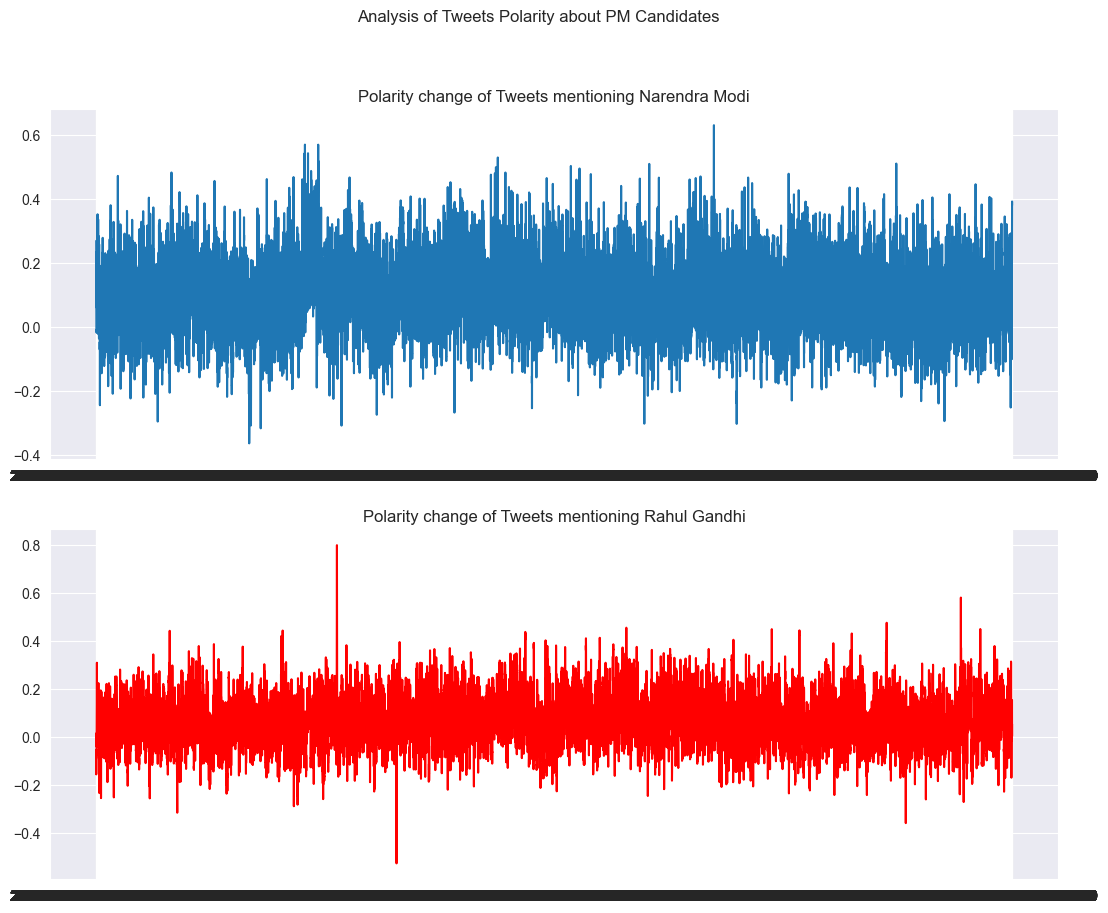

In [80]:
fig, axes = plt.subplots(2, 1, figsize=(13, 10))

axes[0].plot(naModi['Date'], naModi['MA Polarity'])
axes[0].set_title("\n".join(["Polarity change of Tweets mentioning Narendra Modi"]))
axes[1].plot(raGandhi['Date'], raGandhi['MA Polarity'], color='red')
axes[1].set_title("\n".join(["Polarity change of Tweets mentioning Rahul Gandhi"]))

fig.suptitle("\n".join(["Analysis of Tweets Polarity about PM Candidates"]), y=0.98)

plt.show()

For Better understanding lets take a smaller portion of tweets and visualize the same

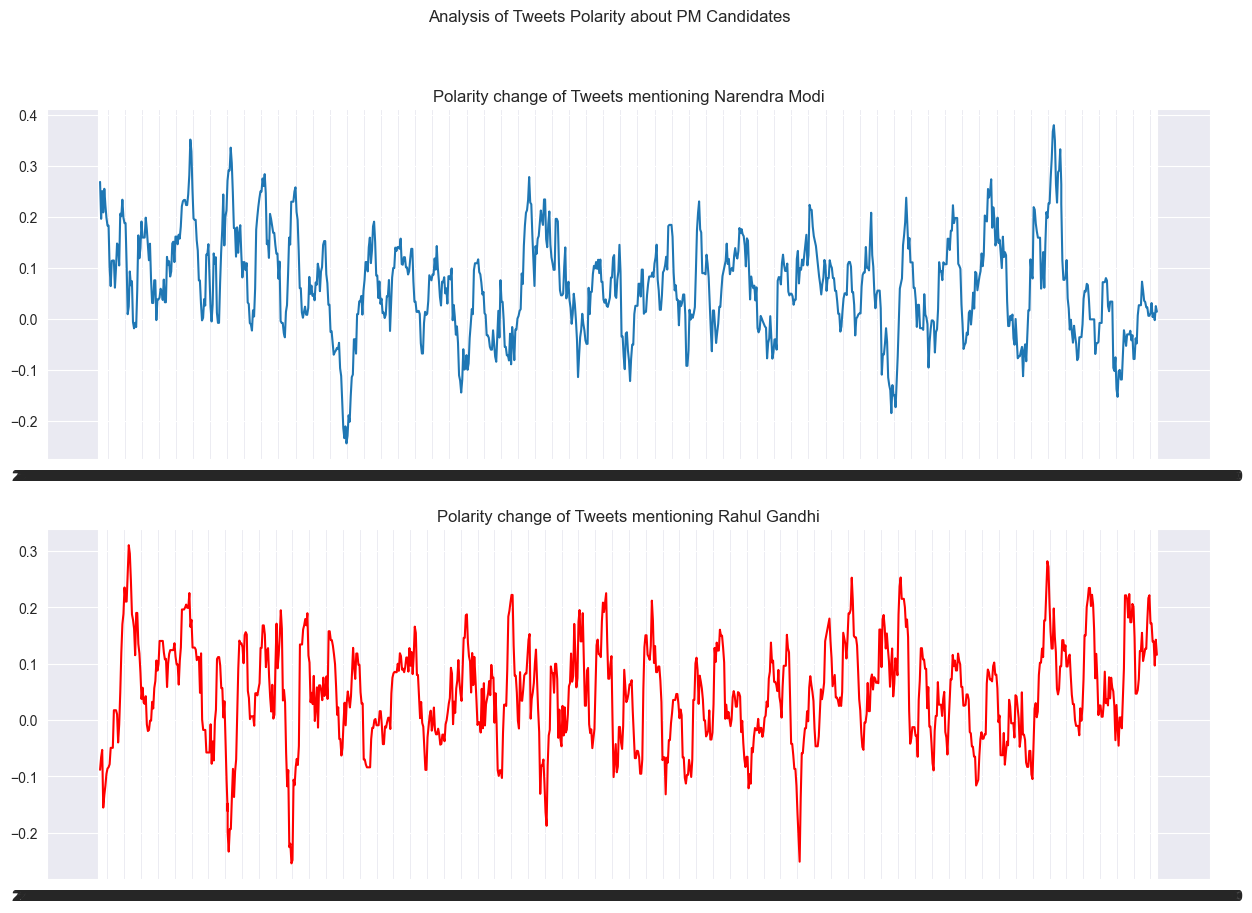

In [81]:
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

axes[0].plot(naModi['Date'][:1000], naModi['MA Polarity'][:1000])
axes[0].set_title("\n".join(["Polarity change of Tweets mentioning Narendra Modi"]))
axes[1].plot(raGandhi['Date'][:1000], raGandhi['MA Polarity'][:1000], color='red')
axes[1].set_title("\n".join(["Polarity change of Tweets mentioning Rahul Gandhi"]))
fig.suptitle("\n".join(["Analysis of Tweets Polarity about PM Candidates"]), y=0.98)
plt.show()

Result
